<a href="https://colab.research.google.com/github/Vikashkrishna/ML_LAB/blob/main/2348571_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv('/content/customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             1
payment_method    1
invoice_date      1
shopping_mall     1
dtype: int64

In [ ]:
df['quantity'].fillna(0, inplace=True)

In [ ]:
df['price'].fillna(0, inplace=True)

In [ ]:
df['payment_method'].fillna(0, inplace=True)

In [ ]:
df['invoice_date'].fillna(0, inplace=True)

In [ ]:
df['gender'].fillna(0,inplace=True)
df['age'].fillna(0,inplace=True)
df['category'].fillna(0,inplace=True)

In [ ]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     1
dtype: int64

In [ ]:
age_bins=[0,18,25,35,45,float('inf')]
age_labels=['<18','18-25','26-35','36-45','46+']
df['AgeGroup']=pd.cut(df['age'],bins=age_bins,labels=age_labels,right=False)
print(df[['age','AgeGroup']])

       age AgeGroup
0       28    26-35
1       21    18-25
2       20    18-25
3       66      46+
4       53      46+
...    ...      ...
82953   65      46+
82954   49      46+
82955   54      46+
82956   40    36-45
82957   63      46+

[82958 rows x 2 columns]


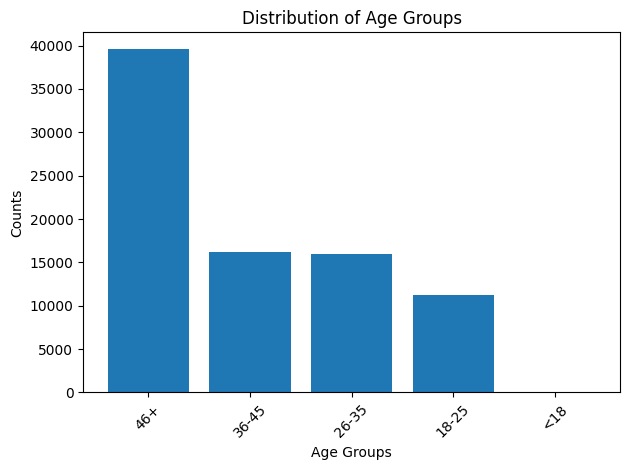

In [ ]:
age_group_counts = df['AgeGroup'].value_counts()
plt.bar(age_group_counts.index, age_group_counts.values)
plt.xlabel("Age Groups")
plt.ylabel("Counts")
plt.title("Distribution of Age Groups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df_encoded = pd.get_dummies(df, columns=["gender", "category"])
print(df_encoded)


      invoice_no customer_id  age  quantity    price payment_method  \
0        I138884     C241288   28         5  1500.40    Credit Card   
1        I317333     C111565   21         3  1800.51     Debit Card   
2        I127801     C266599   20         1   300.08           Cash   
3        I173702     C988172   66         5  3000.85    Credit Card   
4        I337046     C189076   53         4    60.60           Cash   
...          ...         ...  ...       ...      ...            ...   
82953    I208295     C134550   65         3   900.24           Cash   
82954    I786287     C145147   49         4   162.64     Debit Card   
82955    I236025     C315383   54         4   143.36     Debit Card   
82956    I720740     C153048   40         3  1800.51    Credit Card   
82957    I997877     C188564   63         4     0.00              0   

      invoice_date      shopping_mall AgeGroup  gender_Female  gender_Male  \
0         5/8/2022             Kanyon    26-35              1        

In [ ]:
age = df['age']
category_columns = df[['quantity']]
covariance_matrix = np.cov(age, category_columns, rowvar=False)
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
[[2.24787427e+02 2.50049515e-02]
 [2.50049515e-02 1.99743581e+00]]


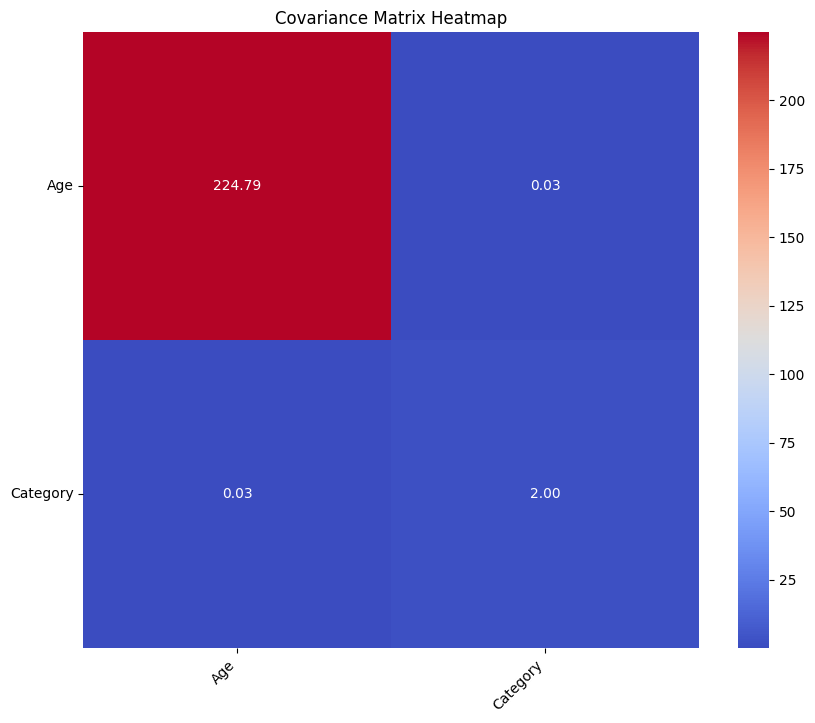

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
feature_names = ['Age', 'Category']
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
heatmap.set_xticklabels(feature_names, rotation=45, ha='right')
heatmap.set_yticklabels(feature_names, rotation=0)
plt.title("Covariance Matrix Heatmap")
plt.show()

In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['gender'], df['category'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Expected-value:",expected)

Chi-Square Statistic: 8.948404759587373
P-value: 0.25638164178004563
Expected-value: [[ 2496.38496589 17161.60100292  7514.84770607  7365.47091299
   5023.24279756  2485.62983678  2506.54258782  5014.28018998]
 [ 1681.61503411 11560.39899708  5062.15229393  4961.52908701
   3383.75720244  1674.37016322  1688.45741218  3377.71981002]]


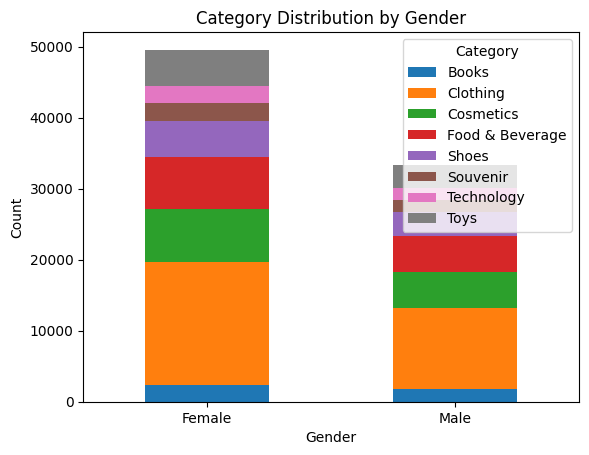

Chi-Square Statistic: 8.948404759587373
p-value: 0.25638164178004563


In [ ]:
contingency_table.plot(kind="bar", stacked=True)
plt.title("Category Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Category")
plt.show()
print("Chi-Square Statistic:",chi2_stat)
print("p-value:", p_val)

In [ ]:
from scipy.stats import ttest_ind
male_data = df[df["gender"] == "Male"]["price"]
female_data = df[df["gender"] == "Female"]["price"]
t_statistic, p_value = ttest_ind(male_data, female_data)
print("T-Statistic:", t_statistic)
print("p-value:", p_value)
if p_value < 0.05:
    print("Reject null hypothesis: The means are significantly different.")
else:
    print("Fail to reject null hypothesis: The means are not significantly different.")

T-Statistic: 0.203936782089111
p-value: 0.8384034013568725
Fail to reject null hypothesis: The means are not significantly different.


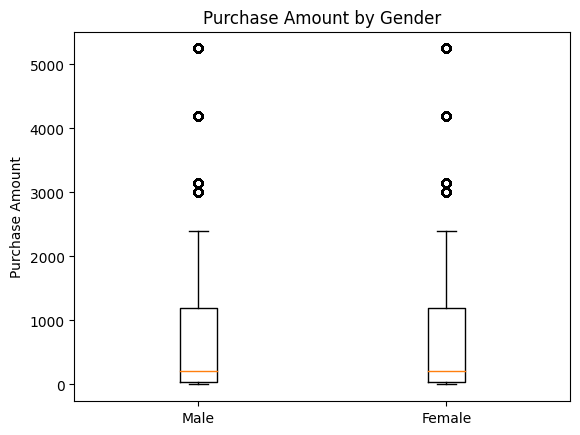

T-Statistic: 0.203936782089111
p-value: 0.8384034013568725
Fail to reject null hypothesis: The means are not significantly different.


In [ ]:
plt.boxplot([male_data, female_data], labels=["Male", "Female"])
plt.title("Purchase Amount by Gender")
plt.ylabel("Purchase Amount")
plt.show()

print("T-Statistic:", t_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject null hypothesis: The means are significantly different.")
else:
    print("Fail to reject null hypothesis: The means are not significantly different.")
